In [117]:
import numpy as np
import matplotlib.pyplot as plt

In [118]:
def my_sqrt(z, branch, theta=0):
    "Square root with different branch cut defined by alpha parameter."
    argument = np.angle(z)  # between -pi and +pi
    modulus = np.abs(z)
    argument = np.mod(argument + theta, 2 * np.pi) - theta
    return np.sqrt(modulus) * np.exp(1j * (argument / 2 + branch * np.pi))

In [138]:
x = np.linspace(-1, 1, 1000)
y = np.linspace(-1, 1, 1000)
X, Y = np.meshgrid(x, y)
Z1 = my_sqrt(X + 1j * Y, 0, theta=0)
Z2 = np.sqrt(X + 1j * Y)

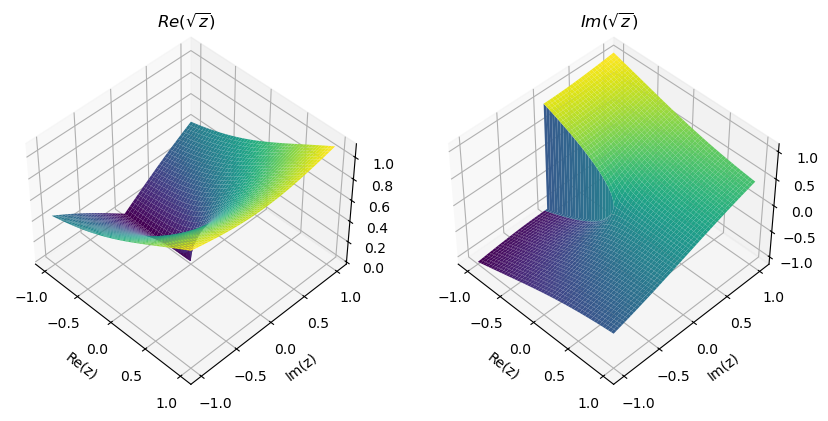

In [120]:
fig, ax = plt.subplots(1,2,subplot_kw={"projection": "3d"}, figsize=(10,5))
ax[0].plot_surface(X, Y, np.real(Z2), cmap='viridis')
ax[0].view_init(45, -45, 0)
ax[0].set_xlabel("Re(z)")
ax[0].set_ylabel("Im(z)")
ax[0].set_title("$Re(\sqrt{z})$")
ax[1].plot_surface(X, Y, np.imag(Z2), cmap='viridis')
ax[1].view_init(45, -45, 0)
ax[1].set_xlabel("Re(z)")
ax[1].set_ylabel("Im(z)")
ax[1].set_title("$Im(\sqrt{z})$")
plt.show()

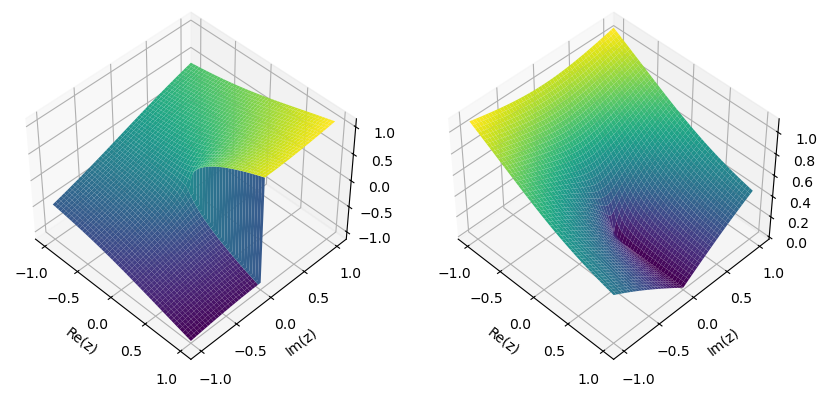

In [139]:
fig, ax = plt.subplots(1,2,subplot_kw={"projection": "3d"}, figsize=(10,5))
ax[0].plot_surface(X, Y, np.real(Z1), cmap='viridis')
ax[0].view_init(45, -45, 0)
ax[0].set_xlabel("Re(z)")
ax[0].set_ylabel("Im(z)")
ax[1].plot_surface(X, Y, np.imag(Z1), cmap='viridis')
ax[1].view_init(45, -45, 0)
ax[1].set_xlabel("Re(z)")
ax[1].set_ylabel("Im(z)")
plt.show()

In [122]:
def lam(x, y, z):
    return x**2 + y**2 + z**2 - 2 * x * y - 2 * x * z - 2 * y * z


def q(s, m1, m2, branch):
    return my_sqrt(lam(s, m1**2, m2**2), branch) / (2 * np.sqrt(s))


def rho(s, m1, m2, branch):
    return 1 / (8 * np.pi) * q(s, m1, m2, branch) / np.sqrt(s)


def n(s, m1, m2, L, q0, branch):
    Q = q(s, m1, m2, branch)
    if L == 0:
        return 1
    elif L == 1:
        F = 1 / np.sqrt(1 + Q**2 / q0**2)
    elif L == 2:
        F = 1 / np.sqrt(9 + 3 * Q**2 / q0**2 + Q**4 / q0**4)
    return (Q / q0) ** L * F


def cm(s, m1, m2, L, q0, branch):
    Q = q(s, m1, m2, branch)
    if L == 0:
        return (
            1
            / (16 * np.pi**2)
            * (
                2
                * Q
                / np.sqrt(s)
                * np.log((m1**2 + m2**2 - s + 2 * np.sqrt(s) * Q) / (2 * m1 * m2))
                - (m1**2 - m2**2) * (1 / s - 1 / (m1 + m2) ** 2) * np.log(m1 / m2)
            )
        )
    else:
        return 1.0j * rho(s, m1, m2, branch) * n(s, m1, m2, L, q0, branch) ** 2


def amp(s, m1, m2, L, q0, g, b, m0, a0, c0, branch):
    n0 = n(s, m1, m2, L, q0, branch)
    rho0 = rho(s, m1, m2, branch)
    K = g**2 / (m0**2 - s) + a0
    P = b * g / (m0**2 - s) + c0
    return n0 * P / (1 - 1.0j * K * rho0 * n0**2)


def amp_cm(s, m1, m2, L, q0, g, b, m0, a0, c0, branch):
    n0 = n(s, m1, m2, L, q0, branch)
    cm0 = cm(s, m1, m2, L, q0, branch)
    K = g**2 / (m0**2 - s) + a0
    P = b * g / (m0**2 - s) + c0
    return n0 * P / (1 - cm0 * K)

In [123]:
s = np.linspace(0.8**2, 1.5**2, 10000) + 0.0j
m1 = 0.493677
m2 = 0.493677

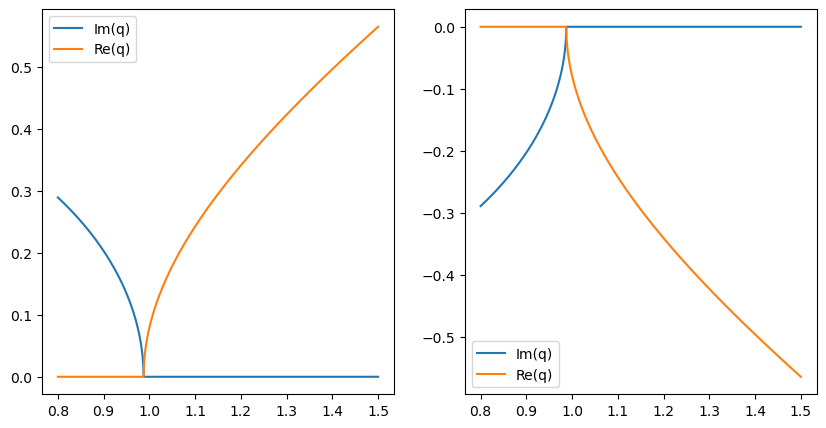

In [135]:
branch = 0
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].plot(np.real(np.sqrt(s)), np.imag(q(s, m1, m2, 0)), label="Im(q)")
ax[0].plot(np.real(np.sqrt(s)), np.real(q(s, m1, m2, 0)), label="Re(q)")
ax[0].legend()
ax[1].plot(np.real(np.sqrt(s)), np.imag(q(s, m1, m2, 1)), label="Im(q)")
ax[1].plot(np.real(np.sqrt(s)), np.real(q(s, m1, m2, 1)), label="Re(q)")
ax[1].legend()
plt.show()

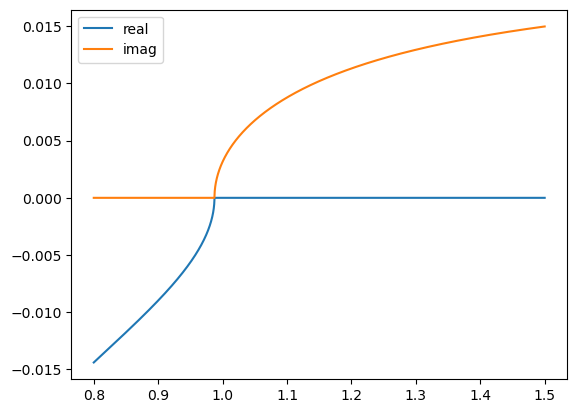

In [125]:
branch = 0
plt.plot(np.real(np.sqrt(s)), np.real(1.0j * rho(s, m1, m2, branch)), label="real")
plt.plot(np.real(np.sqrt(s)), np.imag(1.0j * rho(s, m1, m2, branch)), label="imag")
plt.legend()
plt.show()

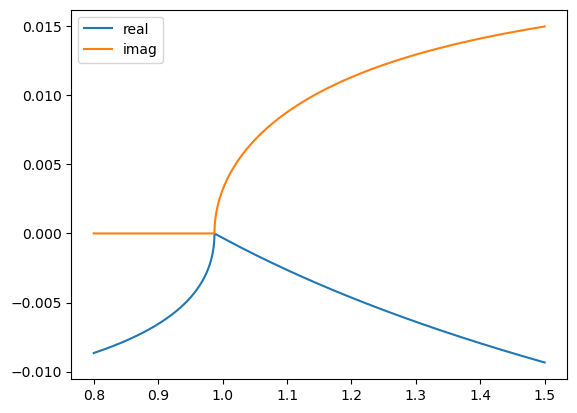

In [126]:
branch = 0
plt.plot(np.real(np.sqrt(s)), np.real(cm(s, m1, m2, 0, 0.1, branch)), label="real")
plt.plot(np.real(np.sqrt(s)), np.imag(cm(s, m1, m2, 0, 0.1, branch)), label="imag")
plt.legend()
plt.show()

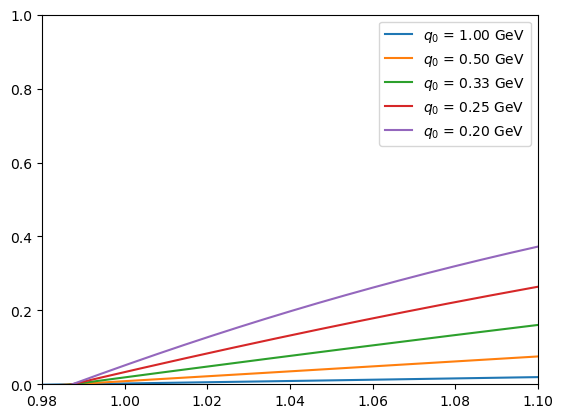

In [140]:
q0s = 1.0 / np.array([1.0, 2.0, 3.0, 4.0, 5.0])
L = 2
branch = 0
for q0 in q0s:
    plt.plot(
        np.real(np.sqrt(s)),
        np.real(n(s, m1=m1, m2=m2, L=L, q0=q0, branch=branch)),
        label=f"$q_0$ = {q0:.2f} GeV",
    )
plt.ylim(0, 1)
plt.xlim(0.98, 1.1)
plt.legend()
plt.show()

g: (0.9351303294219309+0j)


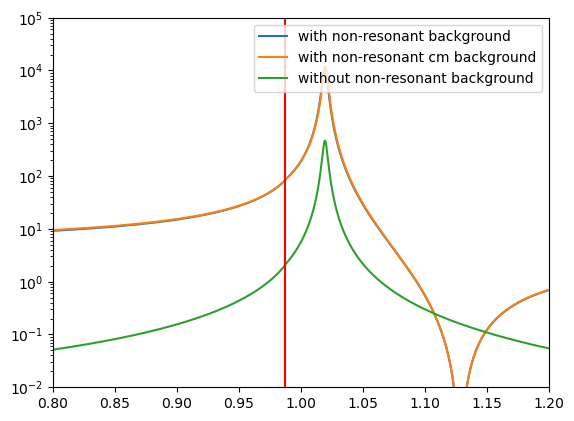

In [141]:
branch = 0
g = 0.5
L = 0
b = 0.1
q0 = 0.33
m0 = 1.019461
width = 0.004249
g = np.sqrt(
    m0 * width / (rho(m0**2, m1, m2, branch) * n(m0**2, m1, m2, L, q0, branch) ** 2)
)
a0 = 0.1
c0 = 0.1

# print("Width:", g**2 * rho(m0**2, m1, m2,branch) / m0)
# g = my_sqrt(1.830 * 0.2 / rho(1.830**2, m1, m0, branch), branch)
print("g:", g)

plt.plot(
    np.real(my_sqrt(s, branch)),
    abs(amp(s, m1=m1, m2=m2, L=L, q0=q0, g=g, b=0.5, m0=m0, a0=1, c0=2, branch=branch))
    ** 2,
    label="with non-resonant background",
)
plt.plot(
    np.real(my_sqrt(s, branch)),
    abs(
        amp_cm(
            s, m1=m1, m2=m2, L=L, q0=q0, g=g, b=0.5, m0=m0, a0=1, c0=2, branch=branch
        )
    )
    ** 2,
    label="with non-resonant cm background",
)
plt.plot(
    np.real(my_sqrt(s, branch)),
    abs(amp(s, m1=m1, m2=m2, L=L, q0=q0, g=g, b=b, m0=m0, a0=0, c0=0, branch=branch))
    ** 2,
    label="without non-resonant background",
)
plt.xlim(0.8, 1.2)
plt.ylim(1e-2, 1e5)
plt.axvline(m1 + m2, color="red")
plt.yscale("log")
plt.legend()
plt.show()

In [129]:
s_imag = np.linspace(-0.0038, -0.0047, 3000) * 1.0j
s_real = np.linspace(1.0375, 1.04, 3000)
X, Y = np.meshgrid(s_real, s_imag)
A = amp(X + Y, m1=m1, m2=m2, L=1, q0=q0, g=g, b=1, m0=m0, a0=0, c0=0, branch=0)

In [130]:
print(-m0 * width)
print(m0**2 - width**2 / 4.0)
sR_real = m0**2 - width**2 / 4.0
sR_imag = -m0 * width
i_maxA = np.argmax(abs(A) ** 2)
pole_mass = X.flatten()[i_maxA]
pole_width = np.imag(Y.flatten()[i_maxA])
print(pole_mass, pole_width)

-0.0043316897889999996
1.0392962170207498
1.0393547849283096 -0.0038


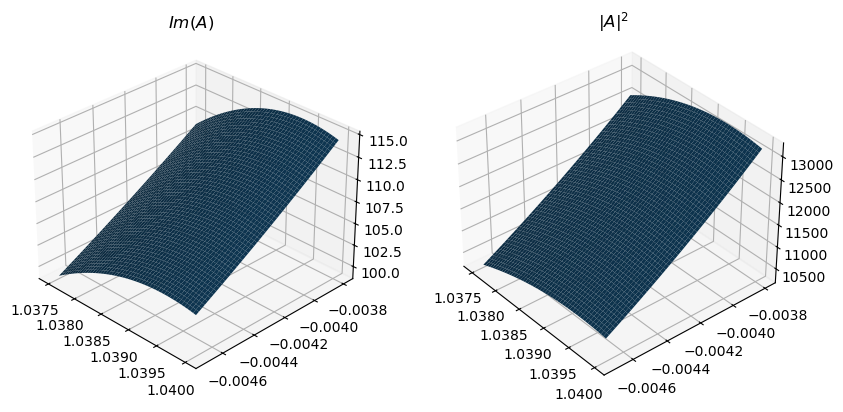

In [131]:
fig, ax = plt.subplots(1, 2, subplot_kw={"projection": "3d"}, figsize=(10, 5))
i = np.where(abs(A)**2 > 1e7)
absA = abs(A)**2
absA[i] = 1e7
i2 = np.where(np.imag(A) > 1e4)
i3 = np.where(np.imag(A) < -1e4)
imA = np.imag(A)
imA[i2] = 1e4
imA[i3] = -1e4
ax[0].set_title("$Im(A)$")
ax[0].plot_surface(X, np.imag(Y), imA, axlim_clip=True, shade=True)
ax[0].view_init(30, -45, 0)
ax[1].set_title("$|A|^2$")
ax[1].plot_surface(X, np.imag(Y), absA, axlim_clip=True, shade=True)
ax[1].view_init(35, -40, 0)
plt.show()

In [132]:
s_imag = np.linspace(-0.0038, -0.0048, 3000) * 1.0j
s_real = np.linspace(1.0375, 1.04, 3000)
X, Y = np.meshgrid(s_real, s_imag)
A = amp(X + Y, m1=m1, m2=m2, L=1, q0=q0, g=g, b=1, m0=m0, a0=0, c0=0, branch=1)

In [133]:
print(-m0 * width)
print(m0**2 - width**2 / 4.0)
sR_real = m0**2 - width**2 / 4.0
sR_imag = -m0 * width
i_maxA = np.argmax(abs(A) ** 2)
pole_mass = X.flatten()[i_maxA]
pole_width = np.imag(Y.flatten()[i_maxA])
print(pole_mass, pole_width)

-0.0043316897889999996
1.0392962170207498
1.0389146382127377 -0.0042938312770923635


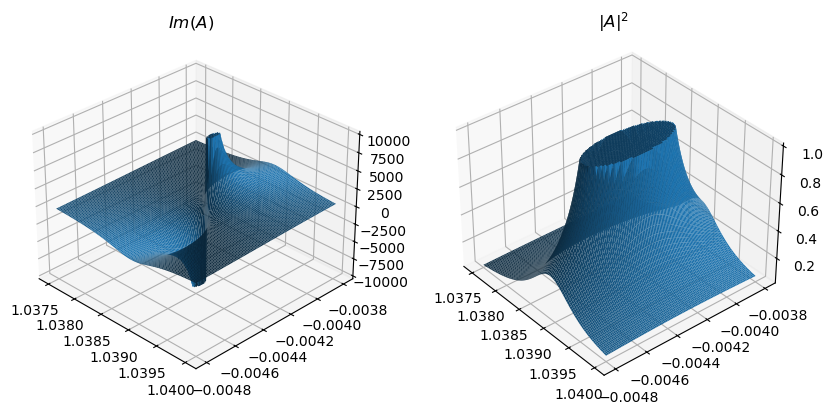

In [134]:
fig, ax = plt.subplots(1, 2, subplot_kw={"projection": "3d"}, figsize=(10, 5))
i = np.where(abs(A) ** 2 > 1e7)
absA = abs(A) ** 2
absA[i] = 1e7
i2 = np.where(np.imag(A) > 1e4)
i3 = np.where(np.imag(A) < -1e4)
imA = np.imag(A)
imA[i2] = 1e4
imA[i3] = -1e4
ax[0].set_title("$Im(A)$")
ax[0].plot_surface(
    rcount=100, ccount=100, X=X, Y=np.imag(Y), Z=imA, axlim_clip=True, shade=True
)
# ax[0].set_zlim(-1e4, 1e4)
ax[0].view_init(30, -45, 0)
ax[1].set_title("$|A|^2$")
ax[1].plot_surface(
    rcount=100, ccount=100, X=X, Y=np.imag(Y), Z=absA, axlim_clip=True, shade=True
)
# ax[1].set_zlim(0, 1e7)
ax[1].view_init(35, -40, 0)
plt.show()